# Process CTD data from cruises not in GLODAPv2022 - users can continuously update this with extra cruises

**Load ARC01 Healy (2015) - later found in GLODAP so no need to process**

In [1]:
"""
import xarray as xr
import requests
# Download the data to local computer from the web
url = "https://cchdo.ucsd.edu/data/38698/33HQ20150809_bottle.nc"
local_filename = "/Users/ko389/Documents/Arctic_Water_Masses/Arctic_data/T_S_data_processing/data/cruises_not_in_GLODAP/33HQ20150809_bottle.nc"

response = requests.get(url)
with open(local_filename, 'wb') as f:
    f.write(response.content)

# Open the data as dataframe
ARC01 = xr.open_dataset(local_filename)
ARC01 = ARC01.to_dataframe()
"""

'\nimport xarray as xr\nimport requests\n# Download the data to local computer from the web\nurl = "https://cchdo.ucsd.edu/data/38698/33HQ20150809_bottle.nc"\nlocal_filename = "/Users/ko389/Documents/Arctic_Water_Masses/Arctic_data/T_S_data_processing/data/cruises_not_in_GLODAP/33HQ20150809_bottle.nc"\n\nresponse = requests.get(url)\nwith open(local_filename, \'wb\') as f:\n    f.write(response.content)\n\n# Open the data as dataframe\nARC01 = xr.open_dataset(local_filename)\nARC01 = ARC01.to_dataframe()\n'

In [2]:
"""
# Remove variables not needed
ARC01.reset_index(inplace=True)
ARC01 = ARC01[['N_PROF', 'station', 'cast','latitude', 'longitude', 'time', 'ctd_oxygen','ctd_temperature', 'ctd_salinity','pressure']]
"""

"\n# Remove variables not needed\nARC01.reset_index(inplace=True)\nARC01 = ARC01[['N_PROF', 'station', 'cast','latitude', 'longitude', 'time', 'ctd_oxygen','ctd_temperature', 'ctd_salinity','pressure']]\n"

**Load ARCO1/GEOTRACES Polarstern 2015 - later found in GLODAP so no need to process**



In [3]:
"""
import xarray as xr
import requests

# Download the data to local computer from the web
url = "https://cchdo.ucsd.edu/data/41337/06AQ20150817_bottle.nc"
local_filename = "/Users/ko389/Documents/Arctic_Water_Masses/Arctic_data/T_S_data_processing/data/cruises_not_in_GLODAP/06AQ20150817_bottle.nc"

response = requests.get(url)
with open(local_filename, 'wb') as f:
    f.write(response.content)

# Open the data as dataframe
ARC01_GEOTRACES = xr.open_dataset(local_filename)
ARC01_GEOTRACES = ARC01_GEOTRACES.to_dataframe()
"""

'\nimport xarray as xr\nimport requests\n\n# Download the data to local computer from the web\nurl = "https://cchdo.ucsd.edu/data/41337/06AQ20150817_bottle.nc"\nlocal_filename = "/Users/ko389/Documents/Arctic_Water_Masses/Arctic_data/T_S_data_processing/data/cruises_not_in_GLODAP/06AQ20150817_bottle.nc"\n\nresponse = requests.get(url)\nwith open(local_filename, \'wb\') as f:\n    f.write(response.content)\n\n# Open the data as dataframe\nARC01_GEOTRACES = xr.open_dataset(local_filename)\nARC01_GEOTRACES = ARC01_GEOTRACES.to_dataframe()\n'

In [4]:
"""
# Remove variables not needed
ARC01_GEOTRACES.reset_index(inplace=True)
ARC01_GEOTRACES = ARC01_GEOTRACES[['N_PROF', 'station', 'cast','latitude', 'longitude', 'time', 'ctd_oxygen','ctd_temperature', 'ctd_salinity','pressure']]
"""

"\n# Remove variables not needed\nARC01_GEOTRACES.reset_index(inplace=True)\nARC01_GEOTRACES = ARC01_GEOTRACES[['N_PROF', 'station', 'cast','latitude', 'longitude', 'time', 'ctd_oxygen','ctd_temperature', 'ctd_salinity','pressure']]\n"

**Load MOSAiC data**

In [3]:

import requests
import pandas as pd

# URL of the .tab file
url = "https://doi.pangaea.de/10.1594/PANGAEA.959966?format=textfile"
local_filename = "/Users/ko389/Documents/Arctic_Water_Masses/Arctic_data/WM_project_data/data/cruises_not_in_GLODAP/MOSAiC_bottle.nc"


# Download the file
response = requests.get(url)

# Save the content to a local file
with open(local_filename, 'wb') as file:
    file.write(response.content)

# Load the .tab file into a DataFrame
MOSAiC = pd.read_csv(local_filename, delimiter='\t', skiprows=185)

# Display the first few rows of the DataFrame
#print(df.head())

In [4]:
# Extract the columns of interest
MOSAiC = MOSAiC[['Date/Time','Latitude', 'Longitude', 'Depth water [m]','Tcon [°C]', 'ASAL [g/kg]', 'O2 [µmol/kg]']]
# Add a new column 'nprof' indicating a new Date/Time
MOSAiC['nprof'] = pd.factorize(MOSAiC['Date/Time'])[0] + 1  # Adding 1 to start from 1 instead of 0


In [5]:
# Convert Date/Time to datetime format
MOSAiC['Date/Time'] = pd.to_datetime(MOSAiC['Date/Time'], format='%Y-%m-%dT%H:%M:%S')
MOSAiC['year']=MOSAiC['Date/Time'].dt.year
MOSAiC['month']=MOSAiC['Date/Time'].dt.month
MOSAiC['day']=MOSAiC['Date/Time'].dt.day
MOSAiC['hour']=MOSAiC['Date/Time'].dt.hour
MOSAiC['minute']=MOSAiC['Date/Time'].dt.minute
MOSAiC['second']=MOSAiC['Date/Time'].dt.second

# Rename columns
MOSAiC.rename(columns={'Date/Time':'datetime','Latitude': 'latitude', 'Longitude': 'longitude',  'Depth water [m]':'depth','Tcon [°C]': 'conservative_temperature', 'ASAL [g/kg]': 'absolute_salinity', 'O2 [µmol/kg]': 'dissolved_oxygen'}, inplace=True)

#Add source name
MOSAiC['source']='MOSAiC'

<Axes: xlabel='datetime', ylabel='Count'>

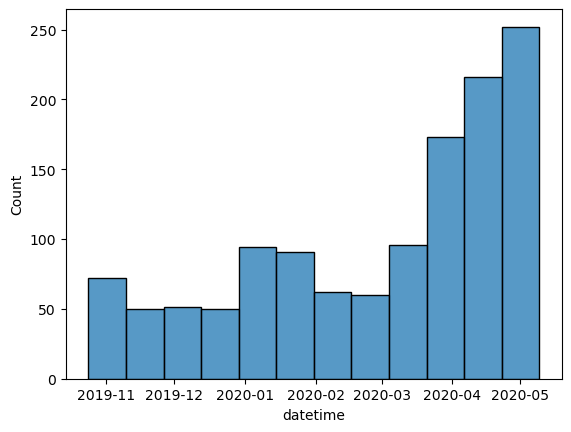

In [6]:
import seaborn as sns
sns.histplot(MOSAiC['datetime'])

**Save cruise data not in GLODAP**


In [8]:
# Save as netCDF
output_file_path = "/Users/ko389/Documents/Arctic_Water_Masses/Arctic_data/T_S_data_processing/data/cruises_not_in_GLODAP/"
output_file_name = "cruises_not_in_GLODAP.nc"
MOSAiC.to_xarray().to_netcdf(output_file_path + output_file_name)